In [ ]:
!pip install yfinance

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt
import colorsys
yf.pdr_override()

[*********************100%***********************]  24 of 24 completed


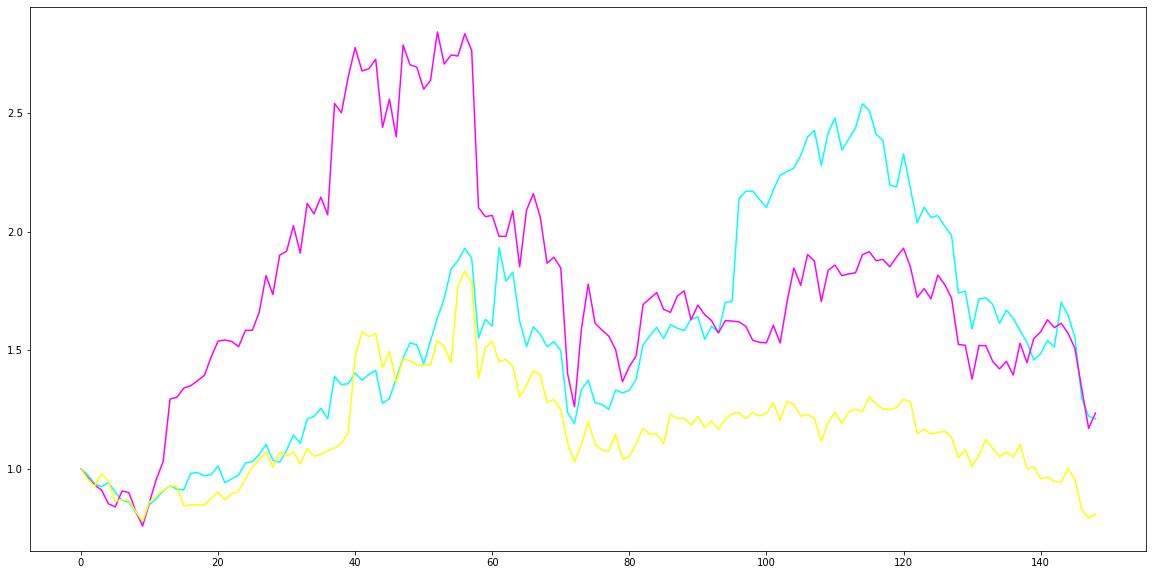

In [ ]:
tickers = ['BTC-USD', 'ETH-USD','ADA-USD', 'BNB-USD', 'XRP-USD', 'HEX-USD', 'SOL1-USD', 'DOGE-USD', 'UNI3-USD', 'LTC-USD', 'LINK-USD', 'BCH-USD', 'LUNA1-USD', 'MATIC-USD', 'VET-USD', 'ETC-USD', 'XLM-USD', 'FIL-USD', 'AVAX-USD', 'THETA-USD', 'TRX-USD', 'GRT2-USD', 'ICP1-USD', 'ATOM1-USD']
days = 150
starting_price = 1

start = dt.date.today() - dt.timedelta(days = days)
end = dt.date.today()

dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

rets = pd.DataFrame()
for tick in tickers:
  temp = []
  for i in range(1, len(dataset[tick])):
    ret = (dataset[tick][i] - dataset[tick][i-1]) / dataset[tick][i-1]
    temp.append(ret)
  rets[tick] = temp

red_rets = []
grn_rets = []
blu_rets = []

for i in range(days-1):
  tick = random.choice(tickers)
  red_rets.append(rets[tick][i])
  tick = random.choice(tickers)
  grn_rets.append(rets[tick][i])
  tick = random.choice(tickers)
  blu_rets.append(rets[tick][i])

red = [starting_price]
grn = [starting_price]
blu = [starting_price]

for i in range(1, days-1):
  next = red[i-1] + (red[i-1] * red_rets[i-1])
  red.append(next)
  next = grn[i-1] + (grn[i-1] * grn_rets[i-1])
  grn.append(next)
  next = blu[i-1] + (blu[i-1] * blu_rets[i-1])
  blu.append(next)

plt.figure(figsize=(20,10))
plt.plot(red, color='cyan')
plt.plot(grn, color='magenta')
plt.plot(blu, color='yellow')
plt.show()

In [ ]:
rgb = dataset.copy()
rgb = rgb.drop(start)
rgb = rgb.drop(end)
rgb['RED'] = red
rgb['GRN'] = grn
rgb['BLU'] = blu

rgb_coor = rgb.corr()
rgb_coor = rgb_coor.drop(columns=tickers)
rgb_coor = rgb_coor.drop(index=['RED', 'GRN', 'BLU'])
rgb_coor = rgb_coor.T

rgb_coor

,ADA-USD,ATOM1-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,FIL-USD,GRT2-USD,HEX-USD,ICP1-USD,LINK-USD,LTC-USD,LUNA1-USD,MATIC-USD,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,VET-USD,XLM-USD,XRP-USD
RED,0.450865,0.744106,0.576149,0.532546,0.706043,0.879455,0.438411,0.222210,0.824647,0.268800,0.737467,0.300136,0.123225,0.804190,0.750495,0.688963,0.703762,0.830459,0.536934,0.785470,0.405590,0.795645,0.757698,0.694719
GRN,0.834273,0.141826,0.021530,0.821134,0.270687,0.277820,0.833534,0.874316,0.310702,0.768749,0.602843,0.219712,0.863893,0.622379,0.401945,0.191138,0.325129,0.122218,0.712102,0.446532,0.777279,0.603507,0.641405,0.758266
BLU,0.884641,0.381734,0.120431,0.756137,0.261779,0.347887,0.675012,0.702785,0.332420,0.834568,0.556854,0.506625,0.719203,0.639119,0.433729,0.242241,0.254073,0.312617,0.593563,0.551255,0.636589,0.584259,0.620274,0.742217


In [ ]:
colors = []

for tick in rgb_coor:
  rgbc = [rgb_coor[tick]['RED'], rgb_coor[tick]['GRN'], rgb_coor[tick]['BLU']]
  rgb = []
  for i in rgbc:
    if i <= 0:
      rgb.append(0)
    else:
      rgb.append(int(i*255/1))
  colors.append(rgb)
  print(tick, rgb)

ADA-USD [114, 212, 225]
ATOM1-USD [189, 36, 97]
AVAX-USD [146, 5, 30]
BCH-USD [135, 209, 192]
BNB-USD [180, 69, 66]
BTC-USD [224, 70, 88]
DOGE-USD [111, 212, 172]
ETC-USD [56, 222, 179]
ETH-USD [210, 79, 84]
FIL-USD [68, 196, 212]
GRT2-USD [188, 153, 141]
HEX-USD [76, 56, 129]
ICP1-USD [31, 220, 183]
LINK-USD [205, 158, 162]
LTC-USD [191, 102, 110]
LUNA1-USD [175, 48, 61]
MATIC-USD [179, 82, 64]
SOL1-USD [211, 31, 79]
THETA-USD [136, 181, 151]
TRX-USD [200, 113, 140]
UNI3-USD [103, 198, 162]
VET-USD [202, 153, 148]
XLM-USD [193, 163, 158]
XRP-USD [177, 193, 189]


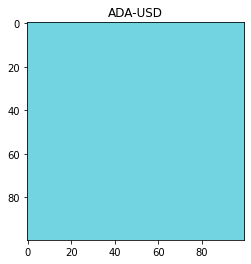

In [ ]:
for i in range(1):
  num = i
  ticks = sorted(tickers)
  im = np.zeros((100,100,3), dtype=int)
  for i in range(100):
    for j in range(100):
      im[i][j] = colors[num]
  plt.title(ticks[num])
  plt.imshow(im)
  plt.show()

In [ ]:
colorsys.rgb_to_hsv(rgb_coor['ADA-USD']['RED'], rgb_coor['ADA-USD']['GRN'], rgb_coor['ADA-USD']['BLU'])

(0.5193527063812949, 0.4903416442159947, 0.8846410403877533)

In [ ]:
a = colorsys.hsv_to_rgb(0.2462616899483759, 0.9358842683096119, 1)

In [ ]:
b = [int(a[0]*255), int(a[1]*255), int(a[2]*255)]
b

[141, 255, 16]

In [ ]:
rgb

[177, 193, 189]

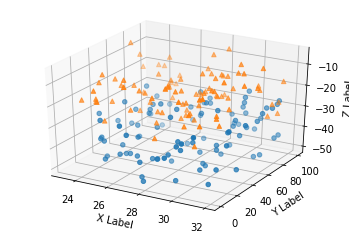

In [ ]:
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
threeD = rgb_coor.transpose()
threeD

,RED,GRN,BLU
ADA-USD,0.450865,0.834273,0.884641
ATOM1-USD,0.744106,0.141826,0.381734
AVAX-USD,0.576149,0.021530,0.120431
BCH-USD,0.532546,0.821134,0.756137
BNB-USD,0.706043,0.270687,0.261779
BTC-USD,0.879455,0.277820,0.347887
DOGE-USD,0.438411,0.833534,0.675012
ETC-USD,0.222210,0.874316,0.702785
ETH-USD,0.824647,0.310702,0.332420
FIL-USD,0.268800,0.768749,0.834568


In [ ]:
red = threeD['RED'].to_numpy()
grn = threeD['GRN'].to_numpy()
blu = threeD['BLU'].to_numpy()
rgb = list()
for i in range(len(red)):
    r = int(red[i]*255)
    if r < 0:
        r=0
    g = int(grn[i]*255)
    if g < 0:
        g=0
    b = int(blu[i]*255)
    if b < 0:
        b=0

    rgb.append([r,g,b])

rgb = np.asarray(rgb)
rgb

array([[114, 212, 225],
       [189,  36,  97],
       [146,   5,  30],
       [135, 209, 192],
       [180,  69,  66],
       [224,  70,  88],
       [111, 212, 172],
       [ 56, 222, 179],
       [210,  79,  84],
       [ 68, 196, 212],
       [188, 153, 141],
       [ 76,  56, 129],
       [ 31, 220, 183],
       [205, 158, 162],
       [191, 102, 110],
       [175,  48,  61],
       [179,  82,  64],
       [211,  31,  79],
       [136, 181, 151],
       [200, 113, 140],
       [103, 198, 162],
       [202, 153, 148],
       [193, 163, 158],
       [177, 193, 189]])

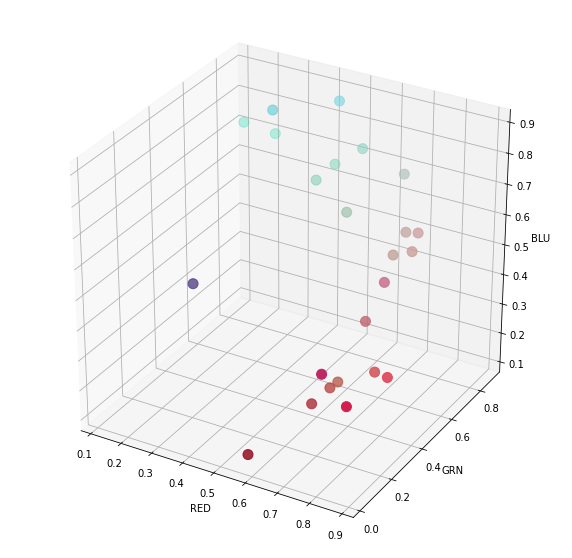

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(red, grn, blu, c = rgb/255.0,  s=100)
ax.set_xlabel('RED')
ax.set_ylabel('GRN')
ax.set_zlabel('BLU')
plt.show()

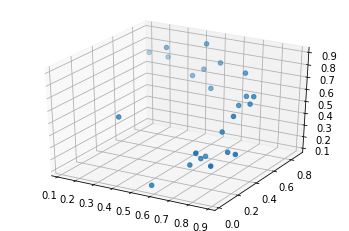

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(threeD['RED'], threeD['GRN'], threeD['BLU'])

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(threeD, x='RED', y='GRN', z='BLU')
fig.show()